### Basic usage

In [1]:
from pathlib import Path
import numpy as np
import importlib
import sea_ingest
sea_ingest = importlib.reload(sea_ingest)
from sea_ingest import seamf
seamf = importlib.reload(seamf)

data_path = Path('data')

# these return dictionaries of pandas dataframes (the default)
dfs1 = sea_ingest.read_seamf(data_path/'example_v1.sigmf', tz="America/New_York")
dfs2 = sea_ingest.read_seamf(data_path/'example_v2.sigmf', tz="America/New_York")

meta3 = sea_ingest.read_seamf_meta(data_path/'example_v3.sigmf', tz="America/New_York")
dfs3 = sea_ingest.read_seamf(data_path/'example_v3.sigmf', tz="America/New_York")
dfs4 = sea_ingest.read_seamf(data_path/'example_v4.sigmf') # timezone can be automatically identified from v4 onward
dfs5 = sea_ingest.read_seamf(data_path/'example_v5.sigmf')

# # some alternative loading options
arrs5 = sea_ingest.read_seamf(data_path/'example_v5.sigmf', container_cls=np.ndarray, tz="America/New_York")
data5, meta5 = sea_ingest.read_seamf(data_path/'example_v5.sigmf', force_loader_cls=bytes, tz="America/New_York")

### Index name and order consistency check

In [2]:
for df_type in 'pfp', 'psd', 'pvt', 'apd':
    print(f'\n{df_type}:')

    if df_type != 'apd':
        versions = (1,2,3,4,5)
    else:
        versions = (4,5,)

    for version in versions:
        name = f'dfs{version}'
        dfs = locals()[name]
        print(name, dfs[df_type].index.names)



pfp:
dfs1 ['datetime', 'frequency', 'capture_statistic', 'detector']
dfs2 ['datetime', 'frequency', 'capture_statistic', 'detector']
dfs3 ['datetime', 'frequency', 'capture_statistic', 'detector']
dfs4 ['datetime', 'frequency', 'capture_statistic', 'detector']
dfs5 ['datetime', 'frequency', 'capture_statistic', 'detector']

psd:
dfs1 ['datetime', 'frequency', 'capture_statistic']
dfs2 ['datetime', 'frequency', 'capture_statistic']
dfs3 ['datetime', 'frequency', 'capture_statistic']
dfs4 ['datetime', 'frequency', 'capture_statistic']
dfs5 ['datetime', 'frequency', 'capture_statistic']

pvt:
dfs1 ['datetime', 'frequency', 'detector']
dfs2 ['datetime', 'frequency', 'detector']
dfs3 ['datetime', 'frequency', 'detector']
dfs4 ['datetime', 'frequency', 'detector']
dfs5 ['datetime', 'frequency', 'detector']

apd:
dfs4 ['datetime', 'frequency']
dfs5 ['datetime', 'frequency']


### Column consistency check
The first and last 3 column index names

In [3]:
for df_type in 'pfp', 'psd', 'pvt', 'apd':
    print(f'\n{df_type}:')

    if df_type != 'apd':
        versions = (1,2,3,4,5)
    else:
        versions = (4,5,)

    for version in versions:
        name = f'dfs{version}'
        dfs = locals()[name]
        print(name, dfs[df_type].columns[:3].tolist(), dfs[df_type].columns[-3:].tolist())



pfp:
dfs1 [0.0, 1.7857142857142855e-05, 3.571428571428571e-05] [0.00994642857142857, 0.009964285714285714, 0.009982142857142856]
dfs2 [0.0, 1.7857142857142855e-05, 3.571428571428571e-05] [0.00994642857142857, 0.009964285714285714, 0.009982142857142856]
dfs3 [0.0, 1.7857142857142855e-05, 3.571428571428571e-05] [0.00994642857142857, 0.009964285714285714, 0.009982142857142856]
dfs4 [0.0, 1.7857142857142855e-05, 3.571428571428571e-05] [0.00994642857142857, 0.009964285714285714, 0.009982142857142856]
dfs5 [0.0, 1.7857142857142855e-05, 3.571428571428571e-05] [0.00994642857142857, 0.009964285714285714, 0.009982142857142856]

psd:
dfs1 [-4992000.0, -4976000.0, -4960000.0] [4960000.0, 4976000.0, 4992000.0]
dfs2 [-4992000.0, -4976000.0, -4960000.0] [4960000.0, 4976000.0, 4992000.0]
dfs3 [-4992000.0, -4976000.0, -4960000.0] [4960000.0, 4976000.0, 4992000.0]
dfs4 [-4992000.0, -4976000.0, -4960000.0] [4960000.0, 4976000.0, 4992000.0]
dfs5 [-4992000.0, -4976000.0, -4960000.0] [4960000.0, 4976000.0,

### Performance

In [4]:
for version in (1,2,3,4,5):
    if version < 4:
        tz = "America/New_York"
    else:
        # autodetect timezone in newer files
        tz = None

    filename = data_path/f'example_v{version}.sigmf'

    print(f'======= file version {version} =========')
    print('Metadata only:')
    %timeit sea_ingest.read_seamf_meta(filename, tz=tz)

    print('File read raw bytes:')
    %timeit sea_ingest.read_seamf(filename, force_loader_cls=None, tz=tz)

    print('File read + metadata scan + unpack numpy.ndarray:')
    %timeit sea_ingest.read_seamf(filename, container_cls=np.ndarray, tz=tz)

    print('File read + metadata scan + unpack numpy.ndarray -> pd.DataFrame:')
    %timeit sea_ingest.read_seamf(filename, tz=tz)
    print('\n')


======= file version 1 =========
Metadata only:
1.14 ms ± 162 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
File read raw bytes:
9.16 ms ± 1.72 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
File read + metadata scan + unpack numpy.ndarray:
10.5 ms ± 2.1 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
File read + metadata scan + unpack numpy.ndarray -> pd.DataFrame:
17.2 ms ± 6.04 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


======= file version 2 =========
Metadata only:
609 µs ± 50 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
File read raw bytes:
6.42 ms ± 552 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
File read + metadata scan + unpack numpy.ndarray:
8.73 ms ± 622 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
File read + metadata scan + unpack numpy.ndarray -> pd.DataFrame:
9.54 ms ± 394 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


======= file version 3 =========
Metadata only:
526 µs

In [5]:
seamf = importlib.reload(seamf)
%load_ext line_profiler

p = data_path/'example_v5.sigmf'
%lprun -f seamf.read_seamf sea_ingest.read_seamf(p)

Timer unit: 1e-07 s

Total time: 0.0294899 s
File: c:\Users\aromaniello\AppData\Local\miniconda3\envs\sea-ingest\Lib\site-packages\sea_ingest\seamf.py
Function: read_seamf at line 890

Line #      Hits         Time  Per Hit   % Time  Line Contents
   890                                           def read_seamf(
   891                                               file,
   892                                               force_loader_cls=False,
   893                                               container_cls=pd.DataFrame,
   894                                               hash_check=True,
   895                                               tz=None,
   896                                               localize=False,
   897                                           ) -> dict:
   898                                               """unpacks a sensor data file into a dictionary of numpy or pandas objects
   899                                           
   900                         

### Returned data structure

In [6]:
# channel metadata
dfs5["channel_metadata"]

,,iq_capture_duration_ms,overload,cal_gain_dB,cal_noise_figure_dB,cal_temperature_degC,sigan_reference_level_dBm,sigan_attenuation_dB,sigan_preamp_enable
datetime,frequency,,,,,,,,
2023-06-26 15:44:14.137000+00:00,3.545000e+09,4000,False,30.011,4.881,23.9,-25.0,0.0,True
2023-06-26 15:44:18.764000+00:00,3.555000e+09,4000,False,30.291,4.552,24.0,-25.0,0.0,True
2023-06-26 15:44:24.580000+00:00,3.565000e+09,4000,False,30.743,4.24,23.9,-25.0,0.0,True
2023-06-26 15:44:29.247000+00:00,3.575000e+09,4000,False,30.617,4.259,23.9,-25.0,0.0,True
2023-06-26 15:44:34.267000+00:00,3.585000e+09,4000,False,30.795,4.101,23.9,-25.0,0.0,True
2023-06-26 15:44:39.495000+00:00,3.595000e+09,4000,False,30.895,4.116,24.0,-25.0,0.0,True
2023-06-26 15:44:44.144000+00:00,3.605000e+09,4000,False,30.925,4.1,24.0,-25.0,0.0,True
2023-06-26 15:44:49.951000+00:00,3.615000e+09,4000,False,30.809,4.18,24.0,-25.0,0.0,True
2023-06-26 15:44:54.599000+00:00,3.625000e+09,4000,False,30.586,4.221,24.0,-25.0,0.0,True


In [7]:
# power spectral density has a "capture_statistic" index
dfs5['psd'].head(6).iloc[:,:6]

Baseband Frequency (Hz)                                          -4992000.0  \
datetime                         frequency    capture_statistic               
2023-06-26 15:44:14.137000+00:00 3.545000e+09 max                  -158.625   
                                              mean                 -170.750   
2023-06-26 15:44:18.764000+00:00 3.555000e+09 max                  -160.000   
                                              mean                 -171.125   
2023-06-26 15:44:24.580000+00:00 3.565000e+09 max                  -134.875   
                                              mean                 -152.875   

Baseband Frequency (Hz)                                          -4976000.0  \
datetime                         frequency    capture_statistic               
2023-06-26 15:44:14.137000+00:00 3.545000e+09 max                  -157.375   
                                              mean                 -169.500   
2023-06-26 15:44:18.764000+00:00 3.555000e+09 max                  -159.125   
                                              mean                 -169.750   
2023-06-26 15:44:24.580000+00:00 3.565000e+09 max                  -134.000   
                                              mean                 -151.875   

Baseband Frequency (Hz)                                          -4960000.0  \
datetime                         frequency    capture_statistic               
2023-06-26 15:44:14.137000+00:00 3.545000e+09 max                  -157.375   
                                              mean                 -169.125   
2023-06-26 15:44:18.764000+00:00 3.555000e+09 max                  -159.250   
                                              mean                 -169.375   
2023-06-26 15:44:24.580000+00:00 3.565000e+09 max                  -133.875   
                                              mean                 -151.750   

Baseband Frequency (Hz)                                          -4944000.0  \
datetime                         frequency    capture_statistic               
2023-06-26 15:44:14.137000+00:00 3.545000e+09 max                  -156.750   
                                              mean                 -169.000   
2023-06-26 15:44:18.764000+00:00 3.555000e+09 max                  -158.875   
                                              mean                 -169.375   
2023-06-26 15:44:24.580000+00:00 3.565000e+09 max                  -133.000   
                                              mean                 -152.000   

Baseband Frequency (Hz)                                          -4928000.0  \
datetime                         frequency    capture_statistic               
2023-06-26 15:44:14.137000+00:00 3.545000e+09 max                  -156.500   
                                              mean                 -169.000   
2023-06-26 15:44:18.764000+00:00 3.555000e+09 max                  -158.750   
                                              mean                 -169.375   
2023-06-26 15:44:24.580000+00:00 3.565000e+09 max                  -132.500   
                                              mean                 -152.250   

Baseband Frequency (Hz)                                          -4912000.0  
datetime                         frequency    capture_statistic              
2023-06-26 15:44:14.137000+00:00 3.545000e+09 max                  -157.375  
                                              mean                 -169.000  
2023-06-26 15:44:18.764000+00:00 3.555000e+09 max                  -158.250  
                                              mean                 -169.375  
2023-06-26 15:44:24.580000+00:00 3.565000e+09 max                  -133.250  
                                              mean                 -151.875

<Axes: xlabel='Baseband Frequency (Hz)', ylabel='PSD (dBm/Hz)'>

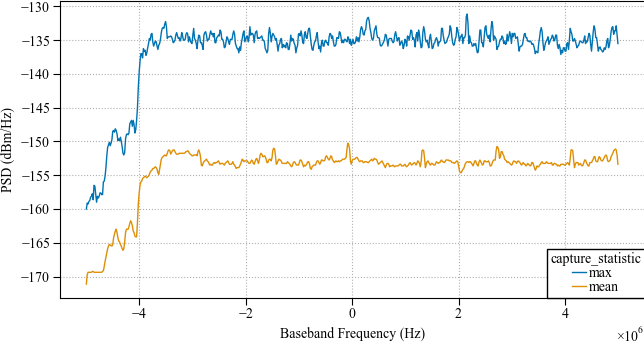

In [8]:
from matplotlib import pyplot as plt
plt.style.use('report.mplstyle')

(
    dfs5['psd']
    .droplevel('datetime')
    .loc(axis=0)[3.555e9]
    .T
    .plot(ylabel='PSD (dBm/Hz)')
)

In [9]:
dfs5['pfp'].head(12).iloc[:,:6]

Frame time elapsed (s)                                                    0.000000  \
datetime                         frequency    capture_statistic detector             
2023-06-26 15:44:14.137000+00:00 3.545000e+09 min               rms       -99.3125   
                                              max               rms       -97.8125   
                                              mean              rms       -98.6875   
                                              min               peak      -91.6250   
                                              max               peak      -81.6875   
                                              mean              peak      -87.5000   
2023-06-26 15:44:18.764000+00:00 3.555000e+09 min               rms       -90.0000   
                                              max               rms       -78.3125   
                                              mean              rms       -82.7500   
                                              min               peak      -80.6875   
                                              max               peak      -63.1875   
                                              mean              peak      -71.7500   

Frame time elapsed (s)                                                    0.000018  \
datetime                         frequency    capture_statistic detector             
2023-06-26 15:44:14.137000+00:00 3.545000e+09 min               rms      -99.37500   
                                              max               rms      -97.50000   
                                              mean              rms      -98.68750   
                                              min               peak     -92.25000   
                                              max               peak     -82.43750   
                                              mean              peak     -87.31250   
2023-06-26 15:44:18.764000+00:00 3.555000e+09 min               rms      -90.56250   
                                              max               rms      -79.25000   
                                              mean              rms      -83.37500   
                                              min               peak     -82.50000   
                                              max               peak     -63.34375   
                                              mean              peak     -71.81250   

Frame time elapsed (s)                                                    0.000036  \
datetime                         frequency    capture_statistic detector             
2023-06-26 15:44:14.137000+00:00 3.545000e+09 min               rms       -99.5000   
                                              max               rms       -97.9375   
                                              mean              rms       -98.6875   
                                              min               peak      -92.4375   
                                              max               peak      -83.3750   
                                              mean              peak      -87.5000   
2023-06-26 15:44:18.764000+00:00 3.555000e+09 min               rms       -89.8125   
                                              max               rms       -79.3750   
                                              mean              rms       -83.1875   
                                              min               peak      -80.1875   
                                              max               peak      -66.0000   
                                              mean              peak      -72.2500   

Frame time elapsed (s)                                                    0.000054  \
datetime                         frequency    capture_statistic detector             
2023-06-26 15:44:14.137000+00:00 3.545000e+09 min               rms       -99.3750   
                                              max               rms       -98.0625   
                                         

<Axes: xlabel='Frame time elapsed (s)', ylabel='PFP (dBm/10MHz)'>

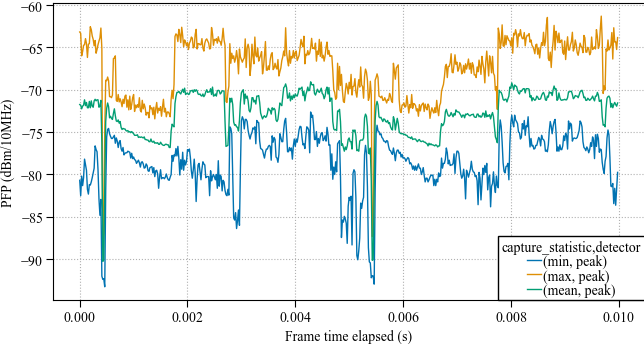

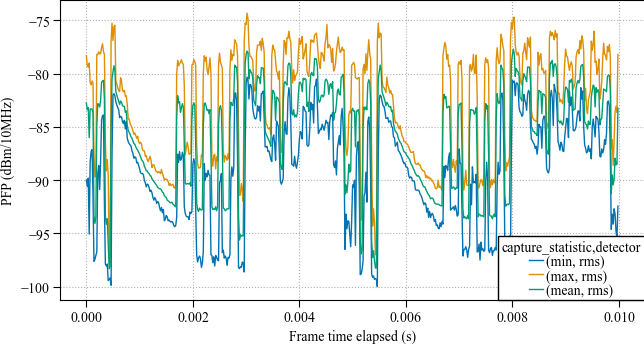

In [10]:
fig, ax = plt.subplots()
(
    dfs5['pfp']
    .loc(axis=0)[:,3.555e9,:,'peak']
    .droplevel(['datetime','frequency'])
    .T
    .plot(ax=ax, ylabel='PFP (dBm/10MHz)')
)

fig, ax = plt.subplots()
(
    dfs5['pfp']
    .loc(axis=0)[:,3.555e9,:,'rms']
    .droplevel(['datetime','frequency'])
    .T
    .plot(ax=ax, ylabel='PFP (dBm/10MHz)')
)

In [11]:
dfs5['apd'].head(12).iloc[:,:8]

,Channel Power (dBm/10MHz),-180,-179,-178,-177,-176,-175,-174,-173
datetime,frequency,,,,,,,,
2023-06-26 15:44:14.137000+00:00,3.545000e+09,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2023-06-26 15:44:18.764000+00:00,3.555000e+09,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2023-06-26 15:44:24.580000+00:00,3.565000e+09,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2023-06-26 15:44:29.247000+00:00,3.575000e+09,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2023-06-26 15:44:34.267000+00:00,3.585000e+09,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2023-06-26 15:44:39.495000+00:00,3.595000e+09,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2023-06-26 15:44:44.144000+00:00,3.605000e+09,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2023-06-26 15:44:49.951000+00:00,3.615000e+09,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2023-06-26 15:44:54.599000+00:00,3.625000e+09,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


1.0   -180
1.0   -179
1.0   -178
1.0   -177
1.0   -176
      ... 
NaN    -34
NaN    -33
NaN    -32
NaN    -31
NaN    -30
Length: 151, dtype: int64

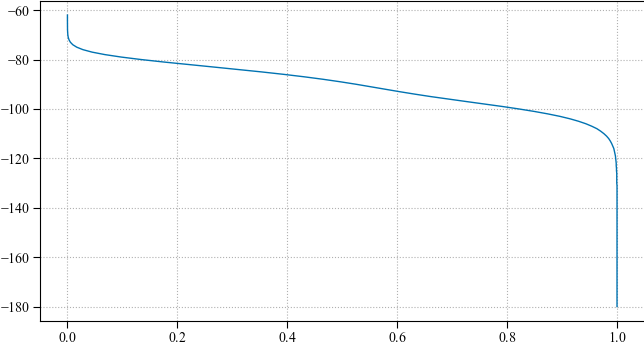

In [12]:
import pandas as pd
fig, ax = plt.subplots()

apd = dfs5['apd'].loc(axis=0)[:,3.555e9]

# Crude APD plot: does not apply Rayleigh axis scaling
# This just shows that the index/data are reversed from what would be expected

# one solution is to create a new series, swapping the axis for the channel data:
apd = pd.Series(apd.columns.values, index=apd.values[0])
apd.plot()
apd
